In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
df = pd.read_csv('Crop_recommendation.csv')

In [71]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


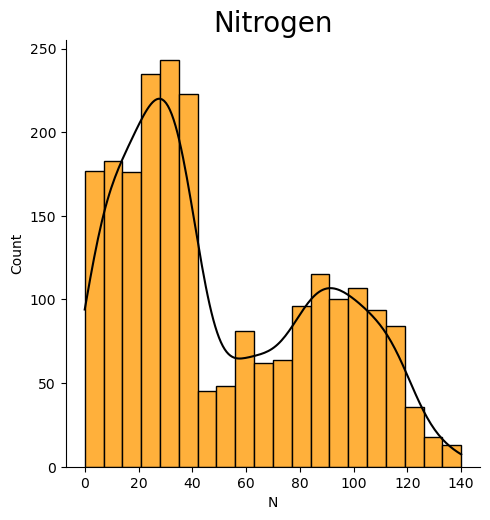

In [72]:
sns.displot(x=df['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Nitrogen",size=20)
plt.show()

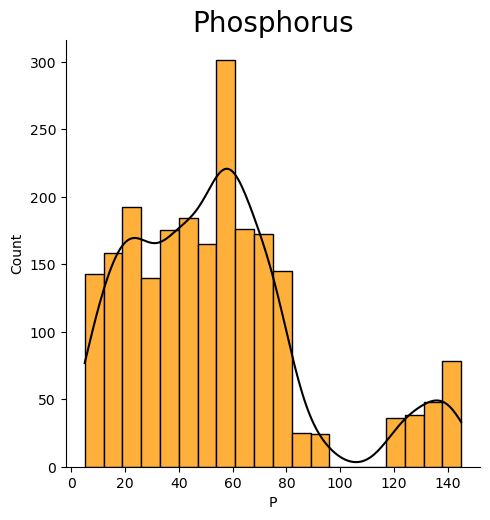

In [73]:
sns.displot(x=df['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

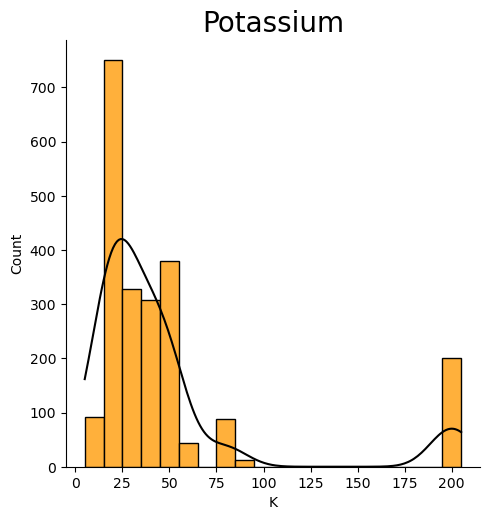

In [74]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

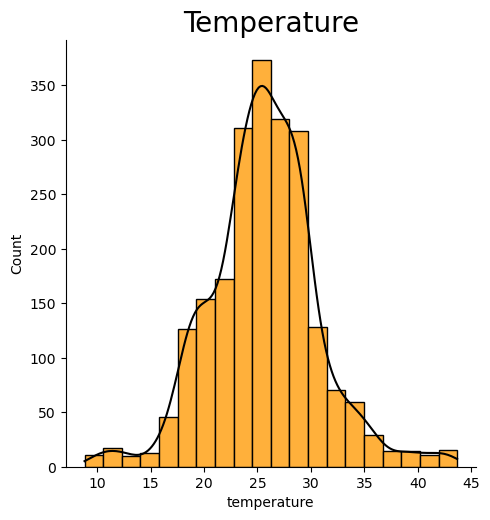

In [75]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Temperature",size=20)
plt.show()

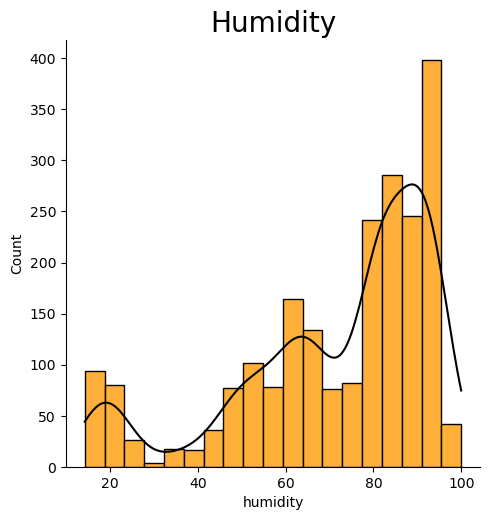

In [76]:
sns.displot(x=df['humidity'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

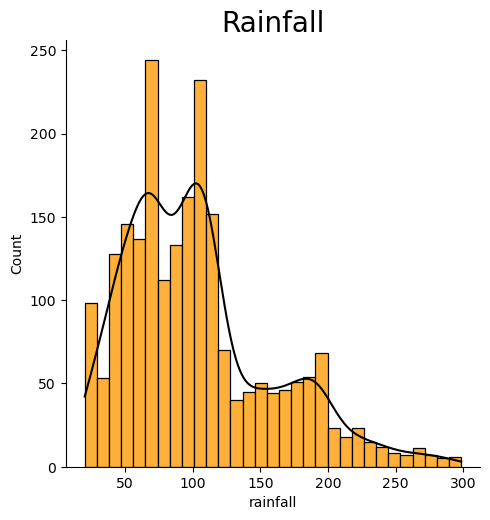

In [77]:
sns.displot(x=df['rainfall'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()


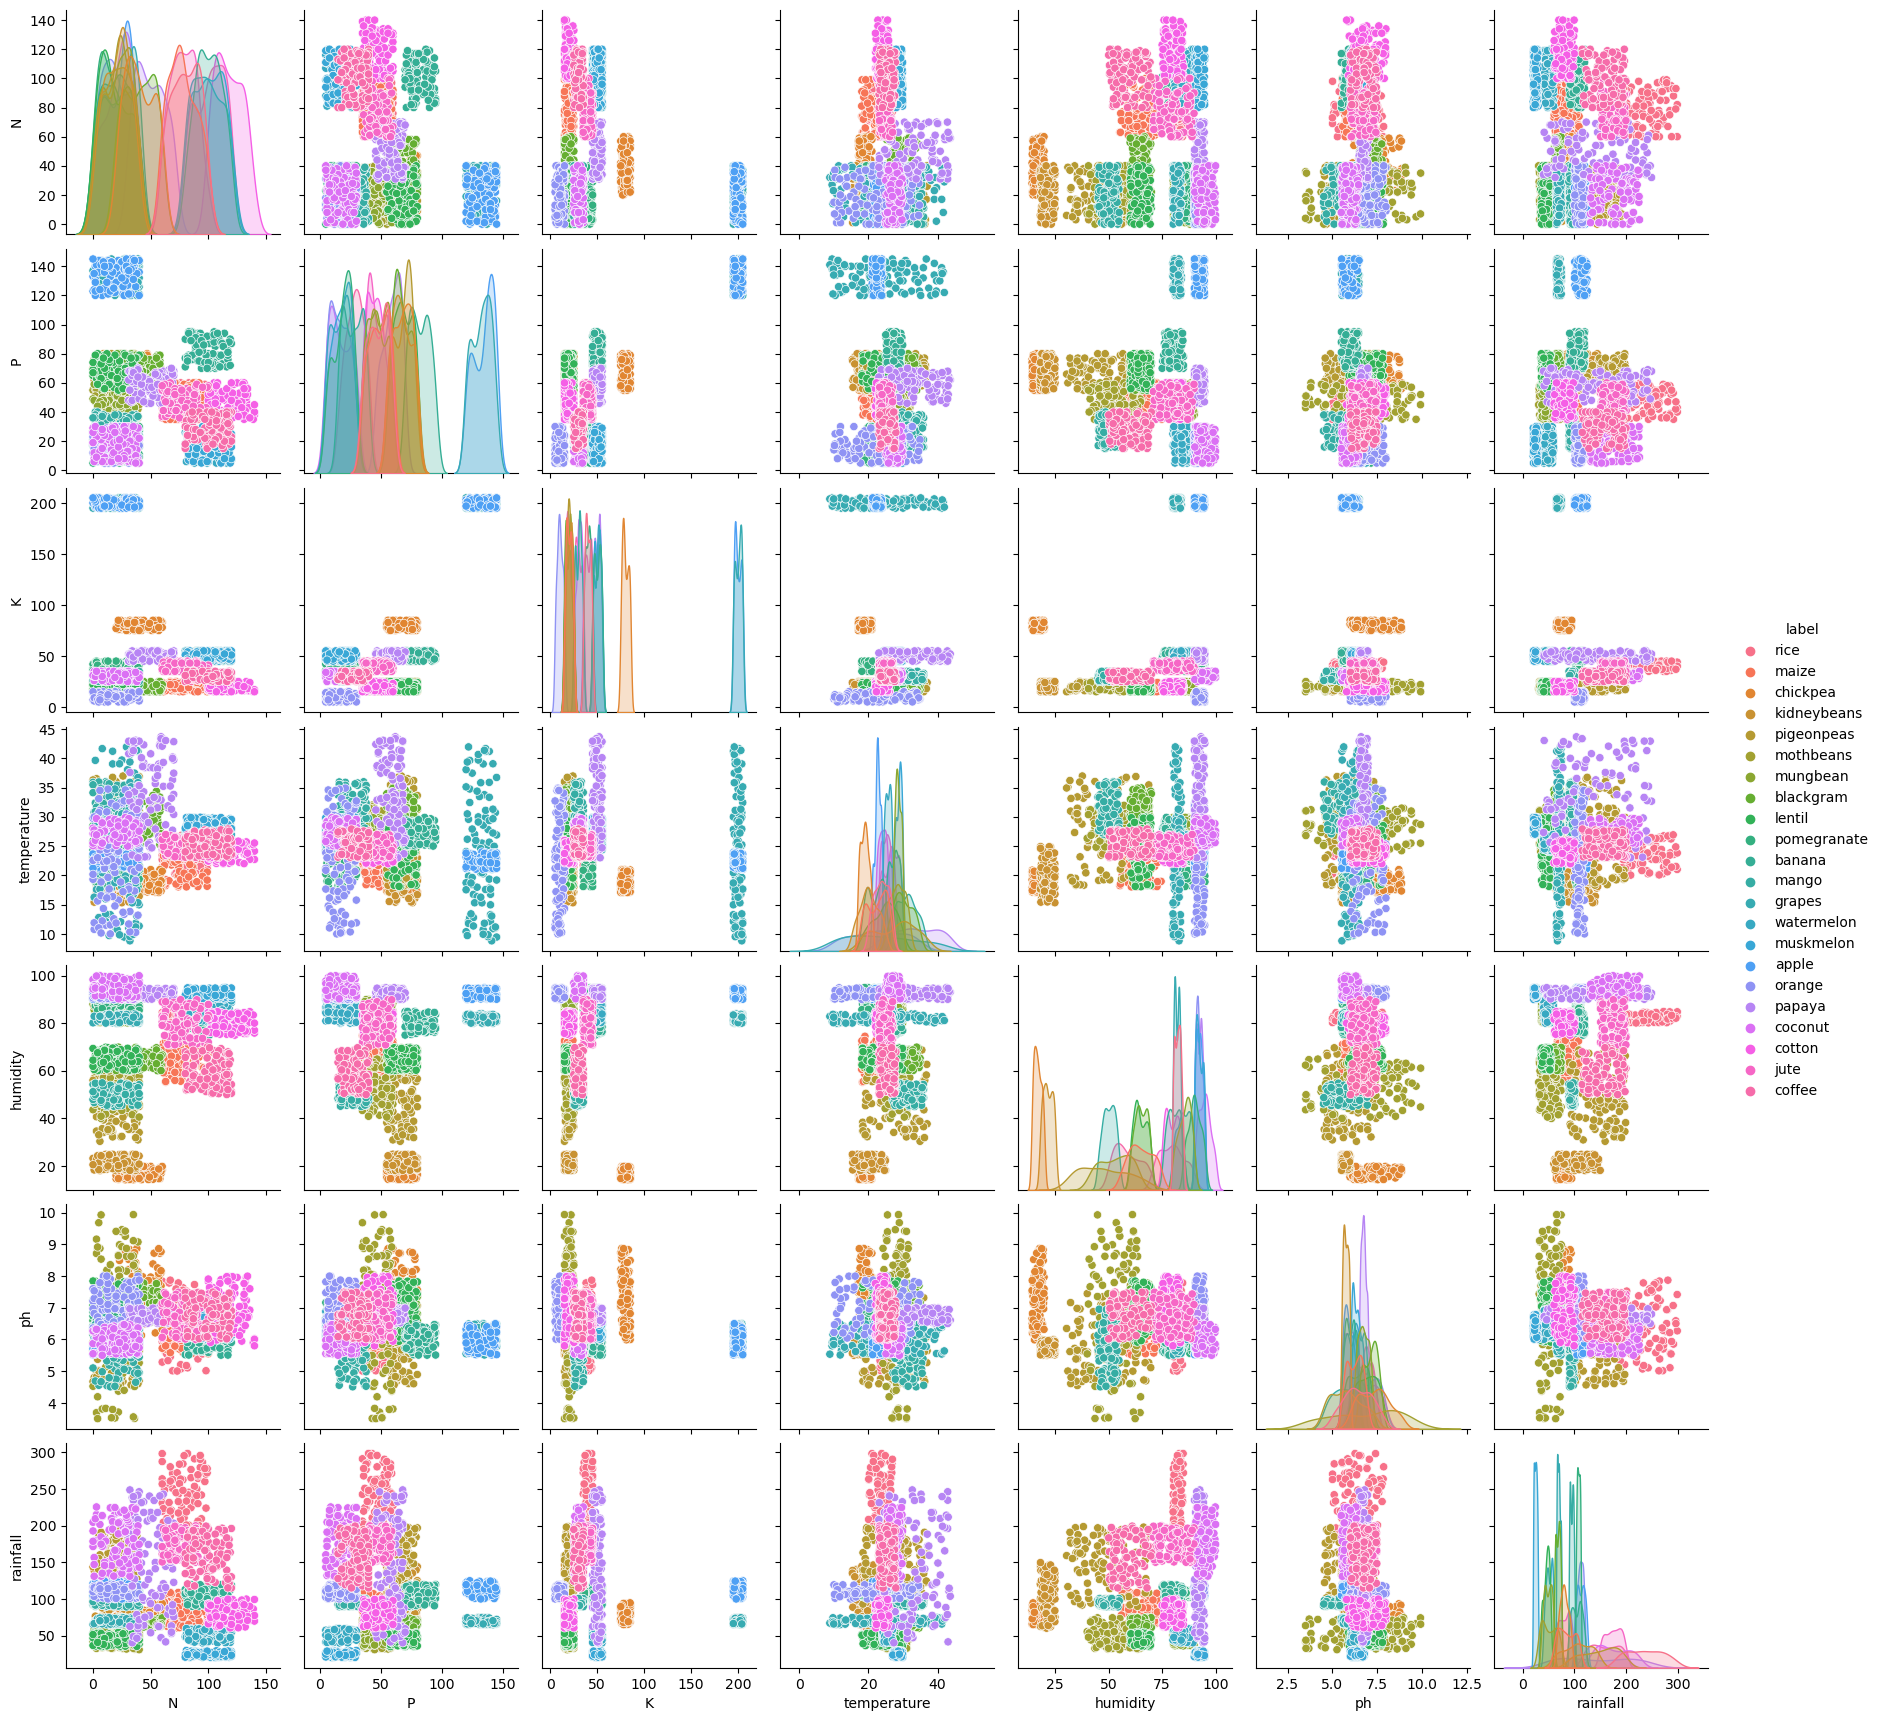

In [78]:
sns.pairplot(data=df,hue='label')
plt.show()

In [79]:
names = df['label'].unique()
names

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [81]:
X=df.drop(['label'],axis=1)
y=df['label']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [84]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

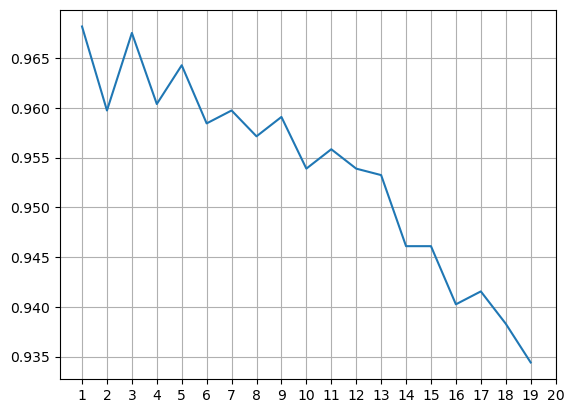

In [86]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.93      0.93      0.93        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.86      1.00      0.92        30
           9       0.97      1.00      0.98        30
          10       0.90      0.90      0.90        30
          11       1.00      0.93      0.97        30
          12       0.97      1.00      0.98        30
          13       0.97      0.93      0.95        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

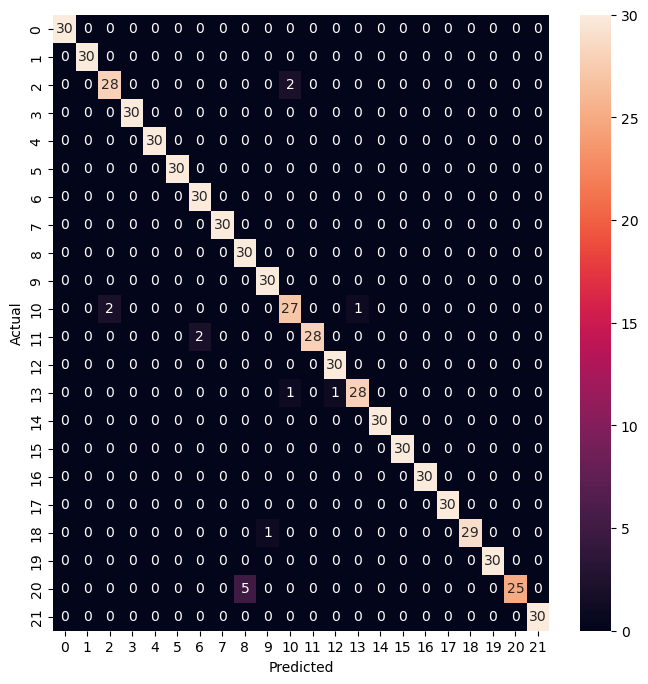

In [92]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

In [88]:
y_test.sort_index()

0       20
4       20
7       20
16      20
22      20
        ..
2182     5
2186     5
2189     5
2193     5
2194     5
Name: label, Length: 660, dtype: int32

In [89]:
X_test.sort_index()

,N,P,K,temperature,humidity,ph,rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488
...,...,...,...,...,...,...,...
655,-1.227885,0.722070,-0.574540,1.073882,-0.213283,-0.293508,1.320687
656,-0.498542,0.447956,0.076361,1.385167,0.950581,0.426076,2.647809
657,-0.606593,2.336294,2.916656,-0.673022,1.043039,-0.525127,0.174065
658,1.257284,-0.861697,0.036913,0.124314,0.424691,-0.484579,-0.987566


In [90]:
def recommend(X):
    probability=knn.predict_proba(X)
    probability = sorted( [(x,i) for (i,x) in enumerate(probability[0])], reverse=True)
    for i,j in probability[:3]:
        print(names[j])
recommend(X_test.sample(1))

orange
coffee
jute


In [91]:
probability=knn.predict_proba(X_test.sample(1))
probability=sorted( [(x,i) for (i,x) in enumerate(probability[0])], reverse=True)
probability

[(1.0, 2),
 (0.0, 21),
 (0.0, 20),
 (0.0, 19),
 (0.0, 18),
 (0.0, 17),
 (0.0, 16),
 (0.0, 15),
 (0.0, 14),
 (0.0, 13),
 (0.0, 12),
 (0.0, 11),
 (0.0, 10),
 (0.0, 9),
 (0.0, 8),
 (0.0, 7),
 (0.0, 6),
 (0.0, 5),
 (0.0, 4),
 (0.0, 3),
 (0.0, 1),
 (0.0, 0)]

In [93]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(knn)
  
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
#knn_from_pickle.predict(X_test)